<img src='https://img.rasset.ie/00087d62-800.jpg' width='60%' align='center'>

---
<h1 align='center'>Fannie Mae Mortgage Default</h1>
<h1 align='center'>Data Exploration</h1>
<h2 align='center'>Predictive Modelling with Machine Learning</h2>
<h3 align='center'>By Jeffery Chu Yun Qiang</h3>

---

# Version

Based on file 'Fannie Mae Mortgage Default Prediction Project (Pandas) - V2.7 (Fully Working Original).ipynb'.

---
The mortgage market in the USA is a \\$10 trillion industry and its performance has a significant bearing on the US economy. The housing market crash of 2008 depressed the US economical engine such that it led to a worldwide downturn in economic activity. Fannie Mae and its brother entity Freddie Mac suffered large losses and required government bailout to survive the crash, to the tune of around \\$200 billion. Some of the reasons cited include low interest rates/easy credit, poor regulation and toxic mortgages.

It is thus interesting to explore and analyse the Fannie Mae mortgage dataset that has been made available by Fannie Mae. The dataset is part of a drive by the US government to encourage greater transparency in credit performance evaluation and is available from [Fannie Mae's website](https://loanperformancedata.fanniemae.com/lppub/index.html). It is large (around 170 GB for the full set) and contains acquisition and monthly performance data on loans that originated from the year 2000 to 2017. 

We will use the 2007 Q4 data set to develop default prediction models using various machine learning algorithms. Being a machine learning project, we need to be methodical and go through the following major steps to properly develop a successful model:

### Structure of Project
1. Definition of target labels
2. Data exploration
3. Feature pre-processing and selection
4. Development and training of predictive models
5. Evaluation of models and metrics comparisons
6. Iterate and improve as necessary

### Definition of Default
We will structure this as a binary classification problem and define a mortgage to have defaulted if payment has been missed for 90 days or more. This is based on the [BASEL II definition of loan default](https://www.federalreserve.gov/boarddocs/press/bcreg/2004/20040626/attachment.pdf). Mortgages that fit this criteria will be labelled with '1' while loans that have not defaulted will be labelled with '0'.

### Dataset Tables
The mortgage dataset consists of 2 main tables:
1. Acquisition
2. Performance

In [1]:
# Import all needed modules
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Set Pandas view options as needed
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

In [2]:
# Set file and path parameters (update to your own file path before continuing)
path_loc = '/mnt/d/Users/machine_learning_projects/Fannie Mae/2007Q4/'
acq_file_name = 'Acquisition_2007Q4.txt'
perf_file_name = 'Performance_2007Q4.txt'

<h1 align='center'>Data Exploration</h1>

We will start with data exploration of each table to check the completeness of information. Fields that have too much missing data will need to be discarded.  


### Exploration - Acquisition Data

The data columns are mapped according to the file format published on Fannie Mae's [dataset FAQs](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_File_layout.pdf). 

In [3]:
# Acquisition File Column and Data Type Definition

acq_cols = ['id_A',
            'orig_channel_A',
            'seller_name_A',
            'orig_int_rate_A',
            'orig_upb_A',
            'orig_loan_term_A',
            'orig_date_A',
            'first_pay_date_A',
            'orig_ltv_A',
            'orig_cltv_A',
            'borrowers_A',
            'orig_dtir_A',
            'borrower_credit_score_A',
            'first_time_buyer_A',
            'purpose_A',
            'property_type_A',
            'num_of_units_A',
            'occupancy_type_A',
            'state_A',
            'zip_A',
            'insurance_perc_A',
            'product_type_A',
            'co_borrower_credit_score_A',
            'insurance_type_A',
            'relocation_A']

acq_dtypes = {'id_A':'int64',
              'orig_channel_A':'object',
              'seller_name_A':'object',
              'orig_int_rate_A':'float64',
              'orig_upb_A':'float64',
              'orig_loan_term_A':'int64',
              'orig_date_A':'object',
              'first_pay_date_A':'object',
              'orig_ltv_A':'float64',
              'orig_cltv_A':'float64',
              'borrowers_A':'float64',
              'orig_dtir_A':'float64',
              'borrower_credit_score_A':'float64',
              'first_time_buyer_A':'object',
              'purpose_A':'object',
              'property_type_A':'object',
              'num_of_units_A':'object',
              'occupancy_type_A':'object',
              'state_A':'object',
              'zip_A':'object',
              'insurance_perc_A':'float64',
              'product_type_A':'object',
              'co_borrower_credit_score_A':'float64',
              'insurance_type_A':'float64',
              'relocation_A':'object'}

# Load Acquisition File
acq_df = pd.read_csv('{path_loc}{file_name}'.format(path_loc=path_loc, file_name=acq_file_name), 
                     sep='|', names=acq_cols, dtype=acq_dtypes)

# Check dataframe dimensions and sample of data
print('Dimensions:{}'.format(acq_df.shape))
display(acq_df.head(10))

Dimensions:(391209, 25)


,id_A,orig_channel_A,seller_name_A,orig_int_rate_A,orig_upb_A,orig_loan_term_A,orig_date_A,first_pay_date_A,orig_ltv_A,orig_cltv_A,borrowers_A,orig_dtir_A,borrower_credit_score_A,first_time_buyer_A,purpose_A,property_type_A,num_of_units_A,occupancy_type_A,state_A,zip_A,insurance_perc_A,product_type_A,co_borrower_credit_score_A,insurance_type_A,relocation_A
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000.0,360,10/2007,12/2007,86.0,86.0,2.0,27.0,751.0,N,C,PU,1,P,CO,809,25.0,FRM,756.0,2.0,N
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000.0,360,10/2007,12/2007,62.0,62.0,2.0,35.0,804.0,N,P,SF,1,P,CA,920,NaN,FRM,790.0,NaN,N
2,100008184591,B,OTHER,6.625,81000.0,360,11/2007,01/2008,64.0,82.0,1.0,53.0,585.0,N,R,SF,1,P,LA,708,NaN,FRM,NaN,NaN,N
3,100008870761,B,AMTRUST BANK,6.500,119000.0,360,11/2007,01/2008,71.0,71.0,1.0,35.0,646.0,N,R,CO,1,P,IL,600,NaN,FRM,NaN,NaN,N
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000.0,360,10/2007,12/2007,27.0,27.0,1.0,54.0,591.0,N,C,SF,1,P,CA,907,NaN,FRM,NaN,NaN,N
5,100016840211,R,"PNC BANK, N.A.",6.375,210000.0,360,08/2007,10/2007,80.0,93.0,1.0,42.0,787.0,N,P,SF,1,P,PA,160,NaN,FRM,NaN,NaN,N
6,100023772994,R,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",6.750,172000.0,360,09/2007,11/2007,95.0,95.0,1.0,42.0,698.0,N,P,CO,1,P,IL,605,30.0,FRM,NaN,1.0,N
7,100026162343,B,"BANK OF AMERICA, N.A.",6.875,108000.0,360,11/2007,01/2008,90.0,90.0,2.0,51.0,647.0,N,P,SF,2,I,MO,631,25.0,FRM,668.0,1.0,N
8,100030319603,C,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",6.250,175000.0,180,10/2007,12/2007,70.0,70.0,1.0,53.0,662.0,N,C,SF,1,P,IL,601,NaN,FRM,NaN,NaN,N
9,100031046995,C,"BANK OF AMERICA, N.A.",6.500,224000.0,360,10/2007,12/2007,62.0,62.0,1.0,50.0,744.0,N,R,PU,1,P,AZ,850,NaN,FRM,NaN,NaN,N


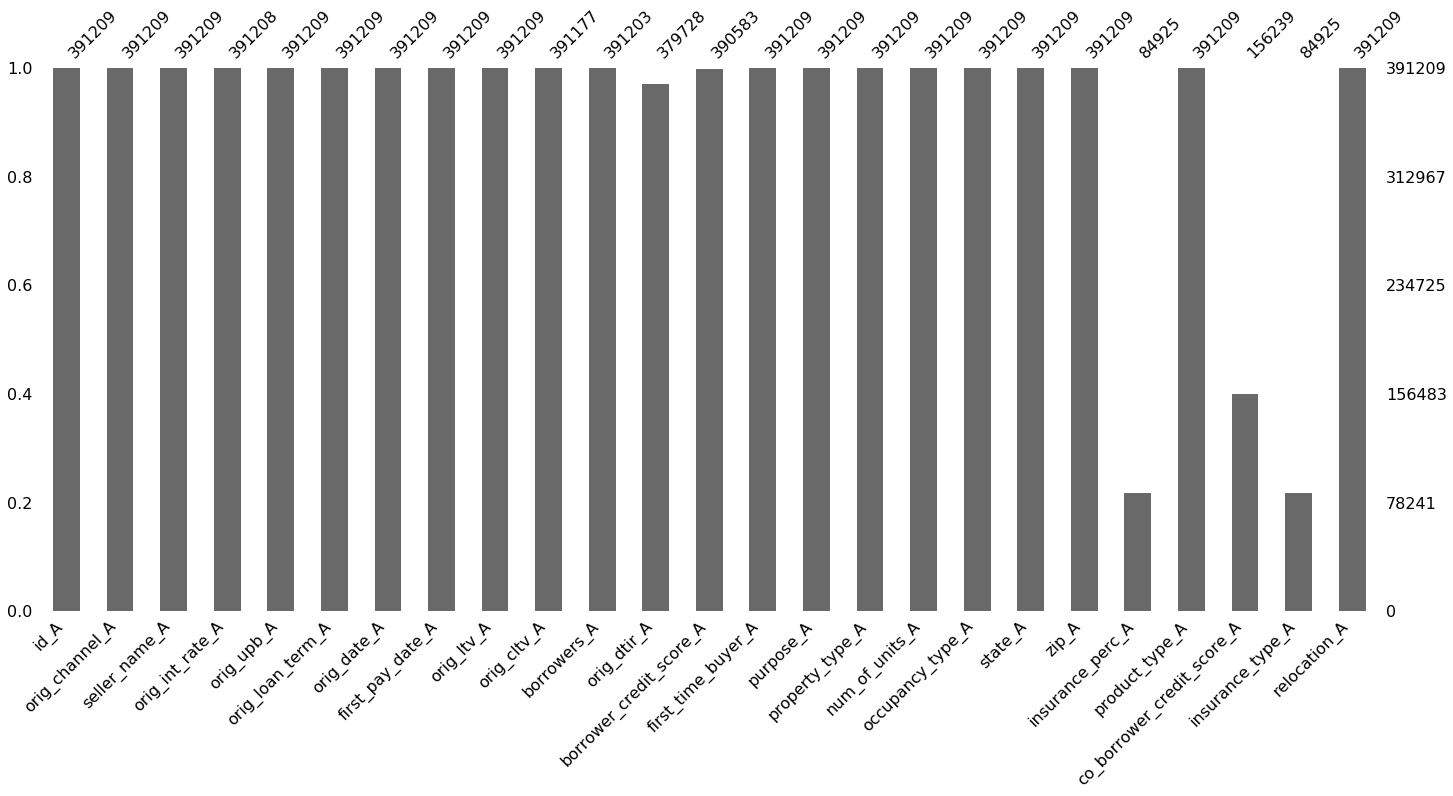

In [4]:
# Plot bar chart of missing data
msno.bar(acq_df)

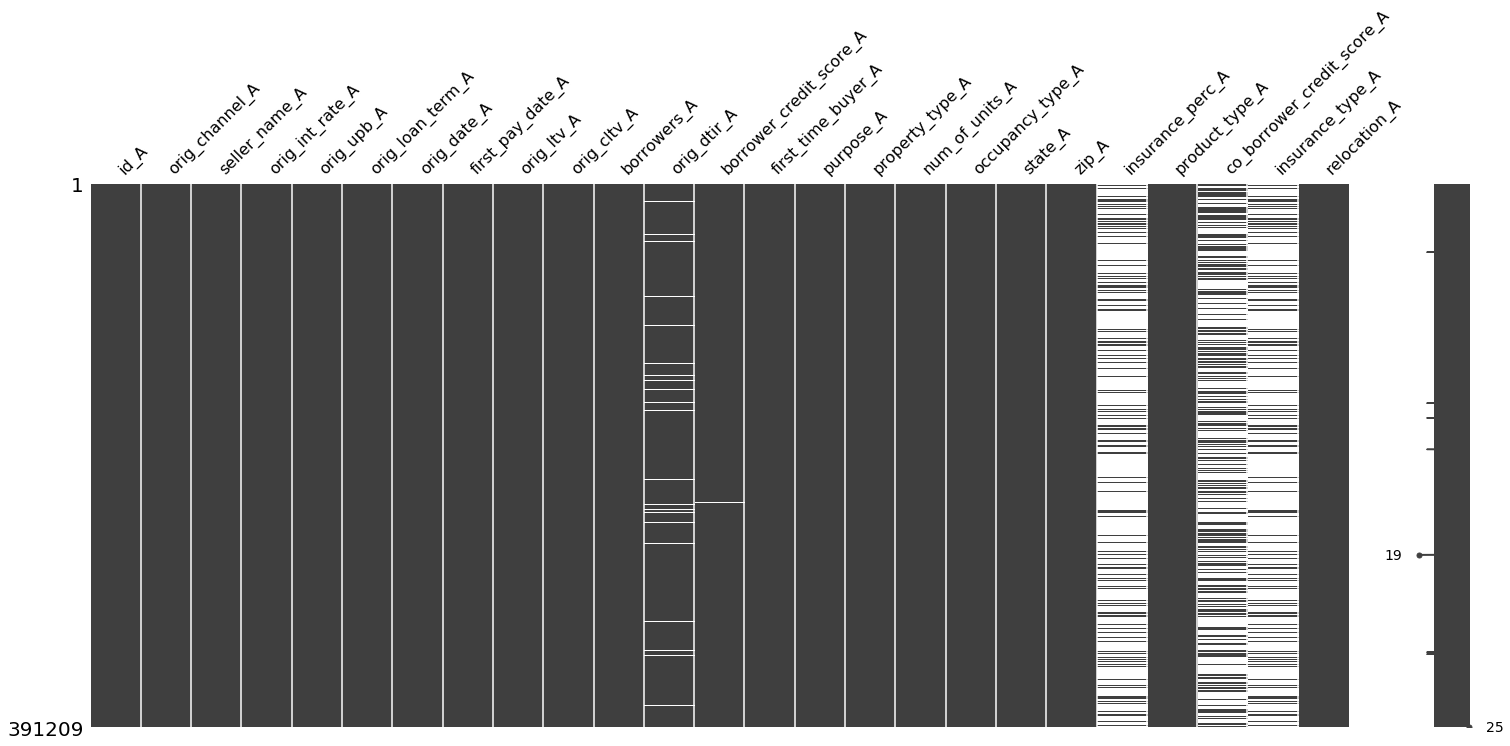

In [5]:
# Visulize missing data in acquisition table
msno.matrix(acq_df)

<br>
Most of the fields are fully filled. Some fields like 'insurance_perc_A' and 'co_borrower_credit_score_A' are sparse and will need to be removed during data-preprocessing. 

Next, we will create some kernel density plots to get a better sense of the distribution of data fields.

### Kernel Density plot of Debt-to-Income Ratio

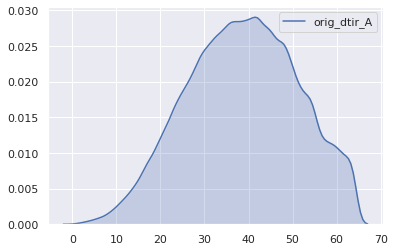

In [6]:
sns.set(style='darkgrid')
trace = acq_df['orig_dtir_A'][~acq_df['orig_dtir_A'].isnull()]
ax = sns.kdeplot(trace, shade=True)

We see that most of the loans are centered around a debt-to-income-ratio of 40.

### Kernel Density plot of Original Loan-to-Value Ratio

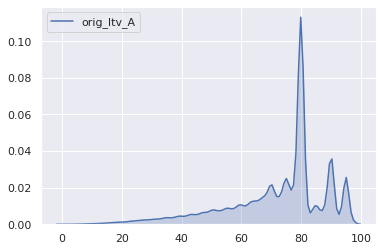

In [7]:
sns.set(style='darkgrid')
trace = acq_df['orig_ltv_A'][~acq_df['orig_ltv_A'].isnull()]
ax = sns.kdeplot(trace, shade=True)

There is a large concentration of mortgages with a loan-to-value ratio of about 80. 

### Kernel Density plot of Credit Scores

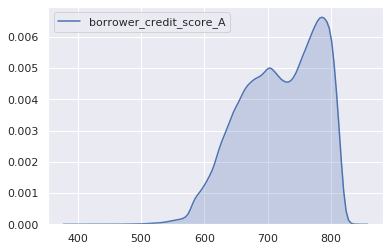

In [8]:
sns.set(style='darkgrid')
trace = acq_df['borrower_credit_score_A'][~acq_df['borrower_credit_score_A'].isnull()]
ax = sns.kdeplot(trace, shade=True)

The vast majority of loans are between credit scores of 600 to 800. 

### Pair plot of 'Original Loan Term', 'Original Loan Amount' and '1st Time Buyer Indicator'

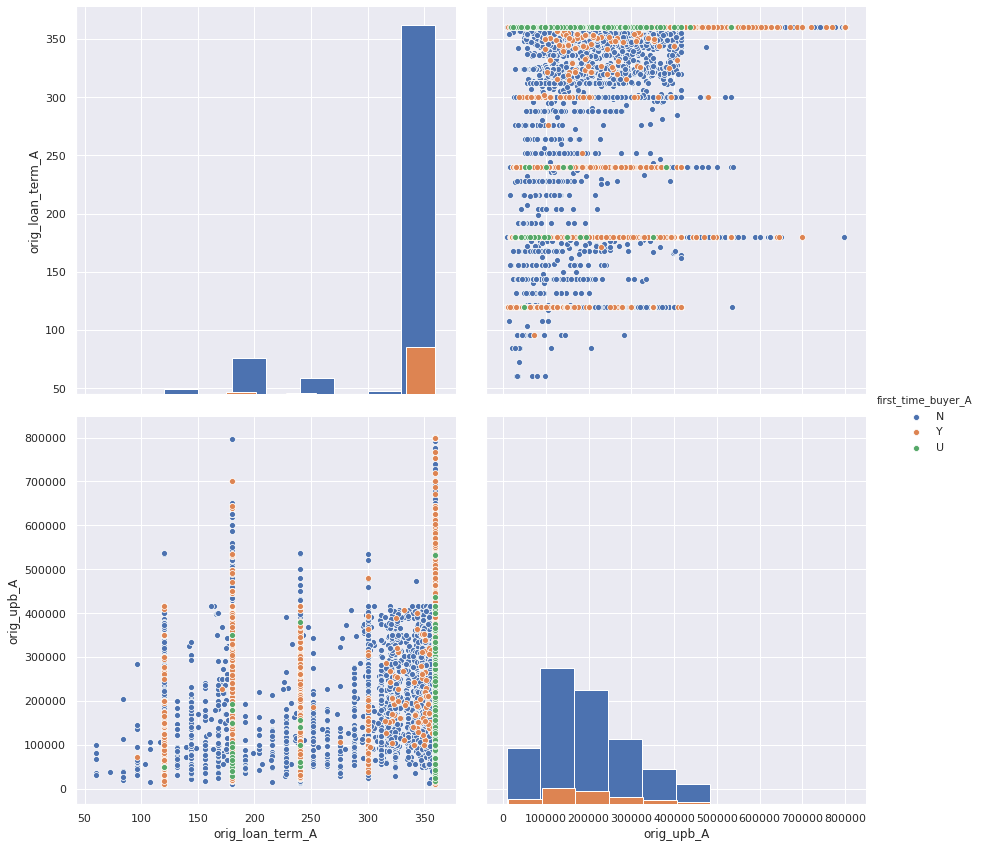

In [9]:
# For palette=sns.cubehelix_palette(n_colors=3, start=200, rot=4, light=0.5, dark=0.5)
# palette=sns.color_palette('GnBu_r', desat=1, n_colors=10)

sns.pairplot(acq_df[['orig_loan_term_A','orig_upb_A','first_time_buyer_A']], height=6, 
             hue='first_time_buyer_A', diag_kind='hist')

<br>
Based on the above graph, we can see that most of the loans that originated in 2007 Q4 were not from first-time home buyers and instead from people who have already bought one or more property assets. 

## Exploration - Performance Data
Examining the file layout, we will join the performance table to the acquisition table so that we can compare the default rates to the potential features on the acquisition table.

The data columns are mapped according to the file format published on Fannie Mae's [dataset FAQs](https://loanperformancedata.fanniemae.com/lppub-docs/FNMA_SF_Loan_Performance_File_layout.pdf). 

In [10]:
# Performance File Column and Data Type Definition

perf_cols = ['id',
             'rep_period',
             'servicer',
             'curr_int_rate',
             'curr_act_upb',
             'loan_age',
             'remaining_months_legal',
             'adjusted_months_legal',
             'maturity_date',
             'MSA',
             'current_loan_stat',
             'mod_flag',
             'zero_bal_code',
             'zero_bal_date',
             'last_paid_date',
             'foreclosure_date',
             'disposition_date',
             'foreclosure_cost',
             'preservation_costs',
             'recovery_costs',
             'holding_expenses_and_credits',
             'holding_tax',
             'net_sale_proceeds',
             'credit_enhance_proceeds',
             'make_whole_proceeds',
             'other_proceeds',
             'non_int_bearing_upd',
             'principal_forgiveness_amount',
             'make_whole_proceeds_flag',
             'foreclosure_principal_write_off',
             'servicing_activity_indicator']

perf_dtypes = {'id':'int64',
               'rep_period':'object',
               'servicer':'object',
               'curr_int_rate':'float64',
               'curr_act_upb':'float64',
               'loan_age':'int64',
               'remaining_months_legal':'float64',
               'adjusted_months_legal':'float64',
               'maturity_date':'object',
               'MSA':'object',
               'current_loan_stat':'object',
               'mod_flag':'object',
               'zero_bal_code':'object',
               'zero_bal_date':'object',
               'last_paid_date':'object',
               'foreclosure_date':'object',
               'disposition_date':'object',
               'foreclosure_cost':'float64',
               'preservation_costs':'float64',
               'recovery_costs':'float64',
               'holding_expenses_and_credits':'float64',
               'holding_tax':'float64',
               'net_sale_proceeds':'float64',
               'credit_enhance_proceeds':'float64',
               'make_whole_proceeds':'float64',
               'other_proceeds':'float64',
               'non_int_bearing_upd':'float64',
               'principal_forgiveness_amount':'float64',
               'make_whole_proceeds_flag':'object',
               'foreclosure_principal_write_off':'float64',
               'servicing_activity_indicator':'str'}
date_cols = ['rep_period']

# Load Performance File
perf_df = pd.read_csv('{path_loc}{file_name}'.format(path_loc=path_loc, file_name=perf_file_name), sep='|',
                      names=perf_cols, dtype=perf_dtypes, 
                      parse_dates=date_cols)

print('Dimensions:{}'.format(perf_df.shape))

Dimensions:(20618621, 31)


In [11]:
perf_df.head(10)

,id,rep_period,servicer,curr_int_rate,curr_act_upb,loan_age,remaining_months_legal,adjusted_months_legal,maturity_date,MSA,current_loan_stat,mod_flag,zero_bal_code,zero_bal_date,last_paid_date,foreclosure_date,disposition_date,foreclosure_cost,preservation_costs,recovery_costs,holding_expenses_and_credits,holding_tax,net_sale_proceeds,credit_enhance_proceeds,make_whole_proceeds,other_proceeds,non_int_bearing_upd,principal_forgiveness_amount,make_whole_proceeds_flag,foreclosure_principal_write_off,servicing_activity_indicator
0,100002296854,2007-11-01,"BANK OF AMERICA, N.A.",6.625,NaN,0,360.0,359.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002296854,2007-12-01,NaN,6.625,NaN,1,359.0,358.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002296854,2008-01-01,NaN,6.625,NaN,2,358.0,357.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100002296854,2008-02-01,NaN,6.625,NaN,3,357.0,356.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100002296854,2008-03-01,NaN,6.625,NaN,4,356.0,355.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,100002296854,2008-04-01,NaN,6.625,NaN,5,355.0,354.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,100002296854,2008-05-01,NaN,6.625,340846.24,6,354.0,353.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,100002296854,2008-06-01,NaN,6.625,340846.24,7,353.0,353.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,100002296854,2008-07-01,NaN,6.625,340215.48,8,352.0,351.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,100002296854,2008-08-01,NaN,6.625,339897.48,9,351.0,350.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [12]:
perf_df[perf_df['id']==100002296854]

,id,rep_period,servicer,curr_int_rate,curr_act_upb,loan_age,remaining_months_legal,adjusted_months_legal,maturity_date,MSA,current_loan_stat,mod_flag,zero_bal_code,zero_bal_date,last_paid_date,foreclosure_date,disposition_date,foreclosure_cost,preservation_costs,recovery_costs,holding_expenses_and_credits,holding_tax,net_sale_proceeds,credit_enhance_proceeds,make_whole_proceeds,other_proceeds,non_int_bearing_upd,principal_forgiveness_amount,make_whole_proceeds_flag,foreclosure_principal_write_off,servicing_activity_indicator
0,100002296854,2007-11-01,"BANK OF AMERICA, N.A.",6.625,NaN,0,360.0,359.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002296854,2007-12-01,NaN,6.625,NaN,1,359.0,358.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100002296854,2008-01-01,NaN,6.625,NaN,2,358.0,357.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100002296854,2008-02-01,NaN,6.625,NaN,3,357.0,356.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,100002296854,2008-03-01,NaN,6.625,NaN,4,356.0,355.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
5,100002296854,2008-04-01,NaN,6.625,NaN,5,355.0,354.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6,100002296854,2008-05-01,NaN,6.625,340846.24,6,354.0,353.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
7,100002296854,2008-06-01,NaN,6.625,340846.24,7,353.0,353.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
8,100002296854,2008-07-01,NaN,6.625,340215.48,8,352.0,351.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
9,100002296854,2008-08-01,NaN,6.625,339897.48,9,351.0,350.0,11/2037,17820,0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


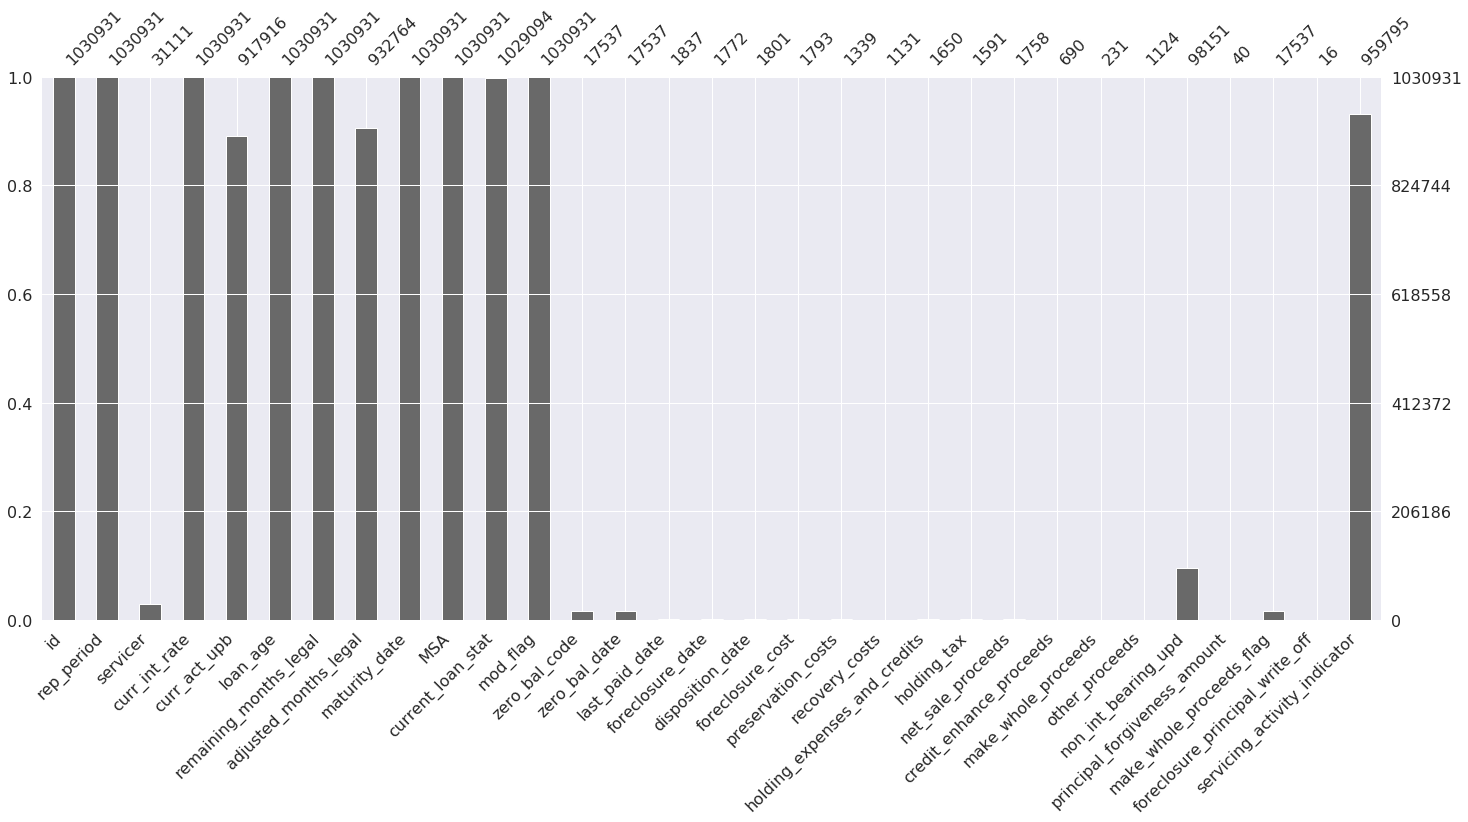

In [13]:
# Plot bar chart of missing data in performance table
msno.bar(perf_df.sample(int(len(perf_df)*0.05)))

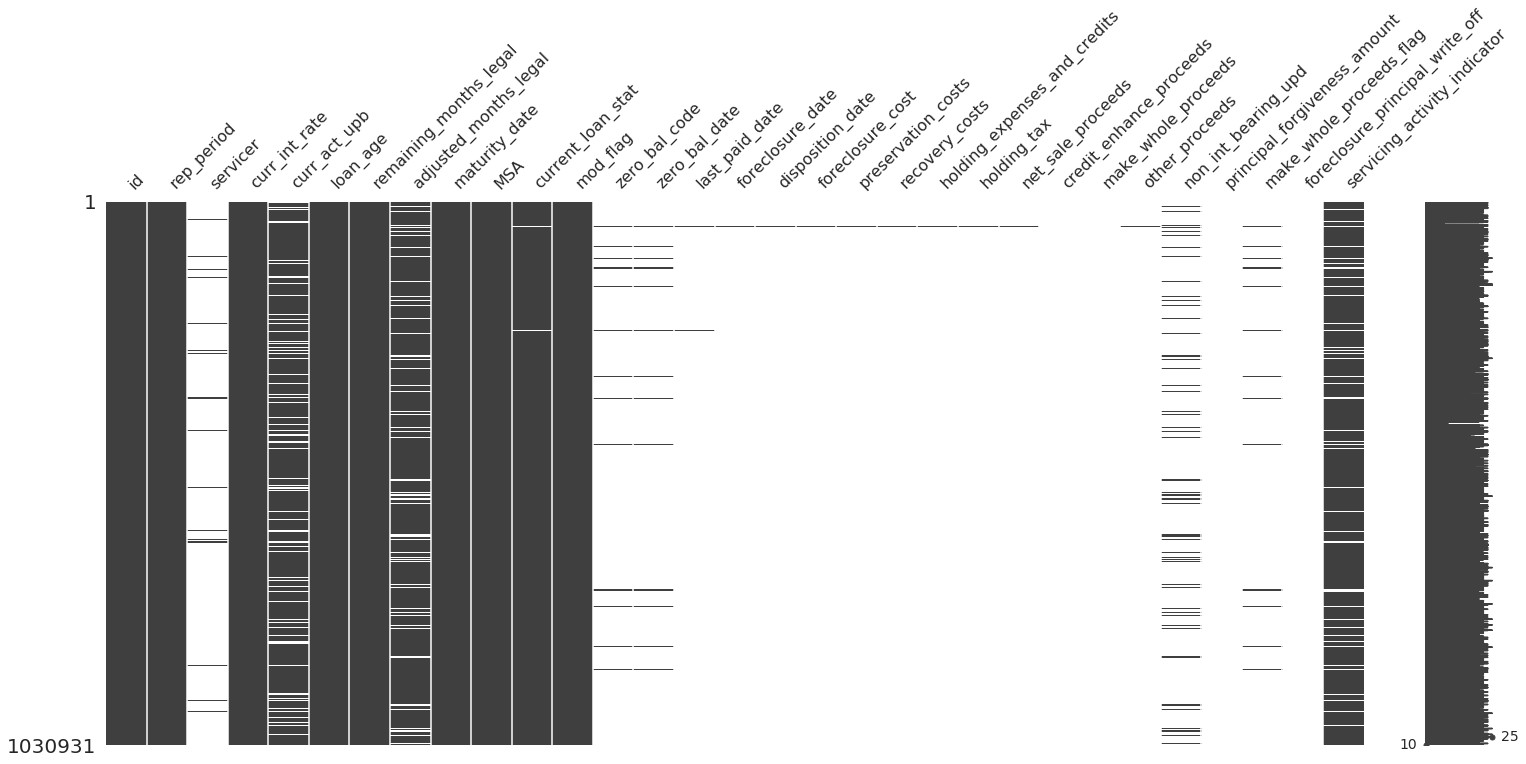

In [14]:
# Visulize missing data in performance table
msno.matrix(perf_df.sample(int(len(perf_df)*0.05)))

Most of the fields are empty in the performance table. This is because many of these fields get populated after the occurrence of a default event (for example, 'recovery_costs','holding_expenses_and_credits' etc). We will thus remove these in our subsequent data processing steps as we only want data available before a default event occurs (like in a real-case scenario). 

In [15]:
# Use id and current loan status
perf_df = perf_df[['id', 'current_loan_stat']]

# Filter to remove nulls in 'current_loan_stat'
perf_df = perf_df[(perf_df['current_loan_stat'].notnull()) & (perf_df['current_loan_stat'] != 'X')]

# With all nulls removed, define the conversion to explore the data with target labels
# As defined previously, we will use the Basel II definition of default (90 days or over without payment)
# This will convert 'current_loan_stat' to a binary field
# Thus, we choose anything with delinquency status of 3 and above as defaulted

perf_df['current_loan_stat'] = perf_df.isin(['0','1','2'])['current_loan_stat'].map({True:0,False:1})

# Group by 'id' to see if a loan defaulted or not
perf_df = perf_df.groupby('id').max()

In [16]:
perf_df.head()

,current_loan_stat
id,
100002296854,0
100006876815,0
100008184591,1
100008870761,1
100013284158,1


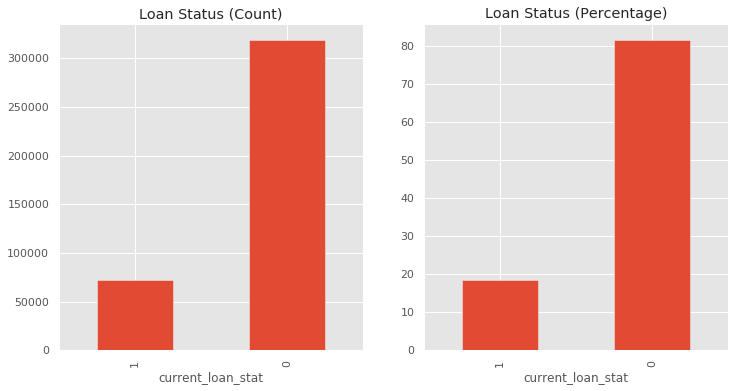

In [17]:
# Visualize the distribution of target labels (default = 1 and non-default = 0)

plt.style.use('ggplot')

fig, ax = plt.subplots(1,2,figsize=(12,6))

(perf_df.groupby('current_loan_stat')['current_loan_stat'].count()
 .sort_values(ascending=True).plot(kind='bar', title='Loan Status (Count)', ax=ax[0]))

# Percentage of target labels
(((perf_df.groupby('current_loan_stat')['current_loan_stat']
   .count()*100/perf_df.count()[0]).sort_values(ascending=True))
   .plot(kind='bar', title='Loan Status (Percentage)', ax=ax[1]))

In [18]:
# Drop unneeded columns
acq_df = acq_df.drop(columns=['orig_channel_A','seller_name_A','orig_loan_term_A',
                                      'orig_date_A','first_pay_date_A','orig_cltv_A',
                                      'borrowers_A','purpose_A','property_type_A','num_of_units_A',
                                      'occupancy_type_A','zip_A','insurance_perc_A',
                                      'product_type_A','co_borrower_credit_score_A','insurance_type_A',
                                      'relocation_A'])

# Join truncated performance and acquisition tables
perf_acq_df = (pd.merge(perf_df, acq_df, left_index=True,right_on=['id_A'], how='inner')
               .drop(columns='id_A'))
perf_acq_df.head()

,current_loan_stat,orig_int_rate_A,orig_upb_A,orig_ltv_A,orig_dtir_A,borrower_credit_score_A,first_time_buyer_A,state_A
0,0,6.625,343000.0,86.0,27.0,751.0,N,CO
1,0,6.250,400000.0,62.0,35.0,804.0,N,CA
2,1,6.625,81000.0,64.0,53.0,585.0,N,LA
3,1,6.500,119000.0,71.0,35.0,646.0,N,IL
4,1,6.625,205000.0,27.0,54.0,591.0,N,CA


In [19]:
perf_acq_df.isnull().mean()

current_loan_stat          0.000000
orig_int_rate_A            0.000003
orig_upb_A                 0.000000
orig_ltv_A                 0.000000
orig_dtir_A                0.029350
borrower_credit_score_A    0.001600
first_time_buyer_A         0.000000
state_A                    0.000000
dtype: float64

In [20]:
# Remove the nulls
perf_acq_df = perf_acq_df[((~perf_acq_df['orig_int_rate_A'].isnull()) & 
                           (~perf_acq_df['orig_dtir_A'].isnull()) & 
                           (~perf_acq_df['borrower_credit_score_A'].isnull()))]

In [21]:
# Bin credit scores
bins = [-float('inf'), 500, 600, 700, 800, float('inf')]
perf_acq_df['binned_credit_scores'] = pd.cut(perf_acq_df['borrower_credit_score_A'], bins)

# Bin interest rates
int_bins = [-float('inf'), 5, 6, 7, 8, 9, float('inf')]
perf_acq_df['binned_int_rate'] = pd.cut(perf_acq_df['orig_int_rate_A'], int_bins, include_lowest=True, right=False)

perf_acq_df.head()

,current_loan_stat,orig_int_rate_A,orig_upb_A,orig_ltv_A,orig_dtir_A,borrower_credit_score_A,first_time_buyer_A,state_A,binned_credit_scores,binned_int_rate
0,0,6.625,343000.0,86.0,27.0,751.0,N,CO,"(700.0, 800.0]","[6.0, 7.0)"
1,0,6.250,400000.0,62.0,35.0,804.0,N,CA,"(800.0, inf]","[6.0, 7.0)"
2,1,6.625,81000.0,64.0,53.0,585.0,N,LA,"(500.0, 600.0]","[6.0, 7.0)"
3,1,6.500,119000.0,71.0,35.0,646.0,N,IL,"(600.0, 700.0]","[6.0, 7.0)"
4,1,6.625,205000.0,27.0,54.0,591.0,N,CA,"(500.0, 600.0]","[6.0, 7.0)"


### Plot 'Interest Rate' vs 'Percentage Defaults from each Category'

Text(0, 0.5, 'Percentage Defaults (%)')

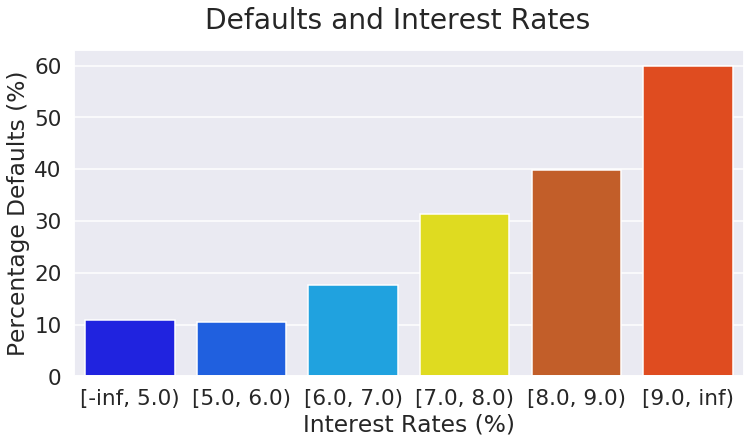

In [22]:
# Set color palette
palette = ['#0004ff','#0055ff','#00aeff','#fffa00','#db560f','#ff3b00']
sns.set_palette(palette)

# Set style and context for font scaling
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.3)

# Set figure and axes objects
fig, ax = plt.subplots(figsize=(12,6))

# Calculate defaults vs interest rate
default_count = perf_acq_df[perf_acq_df['current_loan_stat']==1]\
.groupby(['binned_int_rate'])['current_loan_stat']\
.count()*100/perf_acq_df.groupby(['binned_int_rate'])['current_loan_stat'].count()

# Plot data
sns.barplot(x=default_count.index, y=default_count.values, palette=sns.color_palette(), ax=ax)

# Set titles
fig.suptitle('Defaults and Interest Rates')
ax.set_xlabel('Interest Rates (%)')
ax.set_ylabel('Percentage Defaults (%)')

From the above analysis, we can see that as interest rates rise, the percentage of loans defaulting rises. 

### Plot Credit Score vs Percentage Defaults from each Category

Text(0, 0.5, 'Percentage Defaults (%)')

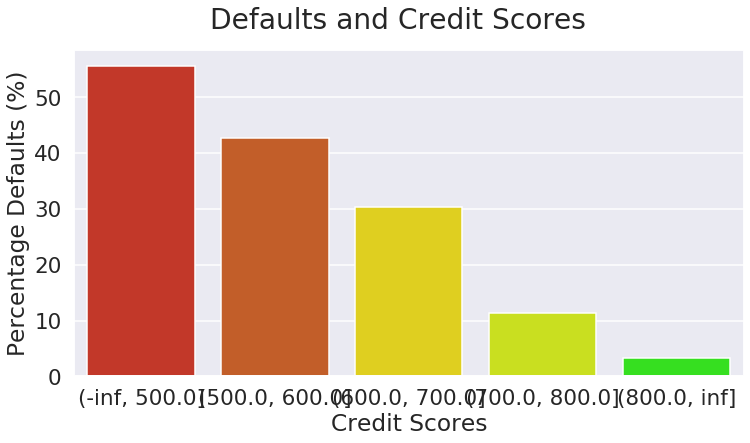

In [23]:
# Set color palette
palette = ['#db230f','#db560f','#ffe900','#e1ff00','#1dff00']
sns.set_palette(palette)

# Set style and context for font scaling
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.3)

# Set figure and axes objects
fig, ax = plt.subplots(figsize=(12,6))

# Calculate defaults vs credit score
default_count = perf_acq_df[perf_acq_df['current_loan_stat']==1]\
.groupby(['binned_credit_scores'])['current_loan_stat']\
.count()*100/perf_acq_df.groupby(['binned_credit_scores'])['current_loan_stat'].count()

# Plot data
sns.barplot(x=default_count.index, y=default_count.values, palette=sns.color_palette(), ax=ax)

# Set titles
fig.suptitle('Defaults and Credit Scores')
ax.set_xlabel('Credit Scores')
ax.set_ylabel('Percentage Defaults (%)')

The higher the credit scores, the 'safer' a potential mortgage as lower default rates tend to result, based on the above analysis. 